# 손글씨 숫자 분류 학습

케라스 파이썬 라이브러리를 사용하여 손글씨 숫자 분류 학습
- 흑백 손글씨 숫자 이미지(28x28 픽셀)를 10개의 범주(0에서 9까지)로 분류
- MNIST 데이터셋 사용
- 1980년대에 미국 국립표준기술연구소에서 수집한 
- 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성
- MNIST 데이터셋은 넘파이 배열 형태로 케라스에 이미 포함되어 있음

## 손글씨 숫자 분류 작업
- (1) 데이터 준비     
- (2) 이미지 데이터 전처리  
  - 2차원 이미지를 1차원 벡터로 변환    
  - 정규화   
  - 원-핫 인코딩       
- (3) 모델링  


### (1) 데이터 준비 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# 데이터 로드 
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# 데이터 세트 확인
X_train.shape  # 3D 텐서 
y_train.shape
X_test.shape
y_test.shape

(60000, 28, 28)

(60000,)

(10000, 28, 28)

(10000,)

In [ ]:
# (60000, 28, 28) :  3D 텐서 
# -> 2D 텐서 : (60000, 28*28) == (60000, 784) (샘플수, 피처수)
# -> 1차원 : (784, ) (데이터 개수)
# input_shape=(28*28, ) == input_shape=(784, )

In [11]:
# X_train 확인
# X_train[0] # 28*28

In [14]:
# 레이블 값 확인
y_train[:10]
y_train[4] # 다섯 번째 값 : 9

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

9

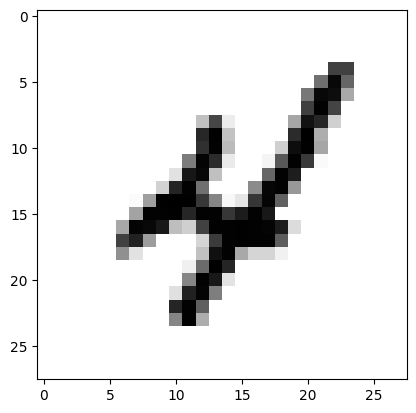

In [23]:
# 다섯 번째 샘플(9)을 시각화해서 확인
digit = X_train[9]

plt.imshow(digit, cmap=plt.cm.binary) #cmap=plt.cm.binary, cmap='RdBu', 디폴트 : viridis
plt.show()

In [20]:
# X_train[9] 
# 화면을 작게하면 4모양이 보임
# 28 * 28 픽셀
# 0 ~ 255 : 숫자가 클수록 진하게 표시 

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

(-0.5, 27.5, 27.5, -0.5)

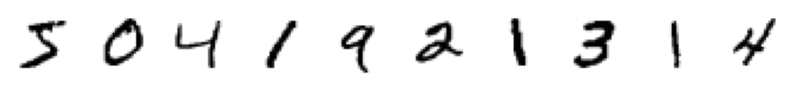

In [27]:
# 처음 10개 손글씨 이미지 확인

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in  range(10):
    axs[i].imshow(X_train[i], cmap=plt.cm.binary) # cmap='PuRd'
    axs[i].axis('off')
    
plt.show()

### (2) 이미지 데이터 전처리
- 3차원 이미지를 2차원으로 변환
  - (60000, 28, 28)  -> (60000, 784) (샘플수, 피처수)  
  - 이유 : Dense 층의 입력값으로 사용 시 
    - 2차원 형태의 데이터 사용하지 못하고  
    - 1차원 형태로 변환해야 함
    - 가로,세로 (28, 28) - > (784, ) 또는 (28*28, )
    - input_shape(784,)  
- 정규화  
  - 이미지의 실제 픽셀 값 : 0~255 범위의 값  
  - 정규화 해서 0~1사이의 값으로 변환  
- 원-핫 인코딩
  - 0~9 숫자 레이블이 범주형이므로 원-핫 인코딩 수행  

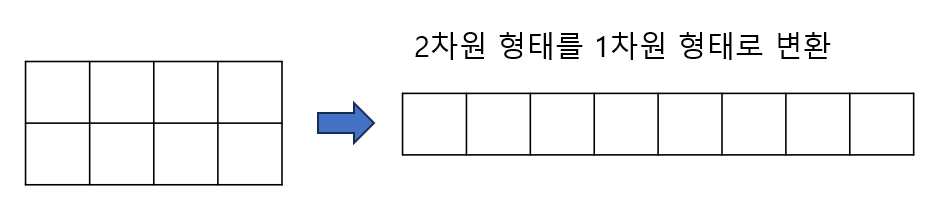

####  reshape / 정규화 (Normalization)

In [28]:
# 이미지의 실제 픽셀 값 확인 : 0~255 범위의 값
np.min(X_train), np.max(X_train)

(0, 255)

In [30]:
150/255  # 그냥 나누면 실수값 반환
150/255.0

0.5882352941176471

0.5882352941176471

In [31]:
x = X_train / 255
np.min(x), np.max(x)

(0.0, 1.0)

In [32]:
# 변환 전 데이터
X_train.shape
X_test.shape

(60000, 28, 28)

(10000, 28, 28)

In [35]:
# 차원 변환 및 정규화
# X_train : (60000, 28, 28)  -> (60000, 28*28) == (60000, 784)
X_train2 = X_train.reshape(60000, 28*28)
X_train2 = X_train2 / 255

# X_test : (10000, 28, 28) -> (10000, 784)
X_test2 = X_test.reshape(10000, 28*28)
X_test2 = X_test2 / 255


In [36]:
# 변환 후 데이터
X_train2.shape
X_test2.shape

(60000, 784)

(10000, 784)

#### 원-핫 인코딩 

In [38]:
# 원-핫 인코딩 수행 전
y_train[:10] # 숫자형 카테고리 값

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [40]:
# 0~9 값의 레이블을 원-핫 인코딩 변환 (바이너리화) : 0 또는 1로 변환

from  keras.utils import to_categorical

y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

In [41]:
y_train2[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# 원-핫 인코딩 수행 후

### (3) 모델링 

#### 모델링 순서  
(1) 모델 설정   
(2) 모델 컴파일   
(3) 모델 학습(실행)   
(4) 모델 평가(결과 출력)  
- 사용 데이터
  - 위에서 전처리 작업 끝낸 데이터 사용
  - X_train2, y_train2, X_test2, y_test2  

#### 모델링 순서  
(1) 모델 설정   
(2) 모델 컴파일   
(3) 모델 학습(실행)   
(4) 모델 평가(결과 출력)  
- 사용 데이터
  - 위에서 전처리 작업 끝낸 데이터 사용
  - X_train2, y_train2, X_test2, y_test2  

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

# (1) 모델 설정
# 2개의 층으로 구성된 모델 
# 첫 번째 층 : 입력 : 28*28=784, 출력 : 512
# 두 번째 층 : (입력 512), 출력 : 10

# 활성화 함수 : activation= 'softmax' : 다중 분류 
# 출력층 출력값 수 : 10
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# (2) 컴파일
# 다중분류 : loss='categorical_crossentropy'
# 최적화 : optimizer='rmsprop'
# 평가방법 :  metrics='accuracy'
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

# (3) 모델 학습 (실행)
# epochs=100
# batch_size=128
epochs = 100
batch_size = 128
# model.fit(X_train2, y_train2, epochs=epochs, batch_size=batch_size)
history = model.fit(X_train2, y_train2, 
                    epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test2, y_test2))
# 학습 과정 결과를 history 객체에 저장
# validation_data 지정해야 함

# (4) 모델 평가 (결과 출력)
# acc, loss
loss, accuracy = model.evaluate(X_test2, y_test2)

print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}')


Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2630 - accuracy: 0.9251 - val_loss: 0.1258 - val_accuracy: 0.9632
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1066 - accuracy: 0.9680 - val_loss: 0.0924 - val_accuracy: 0.9707
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0695 - accuracy: 0.9790 - val_loss: 0.0883 - val_accuracy: 0.9715
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0508 - accuracy: 0.9849 - val_loss: 0.0742 - val_accuracy: 0.9763
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0382 - accuracy: 0.9886 - val_loss: 0.0661 - val_accuracy: 0.9802
Epoch 6/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.0644 - val_accuracy: 0.9806
Epoch 7/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0219 - accuracy: 0.9936 - val_loss: 0.0631 - val_accuracy: 0.9816

Epoch 57/100
469/469 [==============================] - 2s 4ms/step - loss: 6.0894e-05 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9832
Epoch 58/100
469/469 [==============================] - 2s 4ms/step - loss: 5.9491e-05 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9831
Epoch 59/100
469/469 [==============================] - 2s 4ms/step - loss: 5.8276e-05 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9829
Epoch 60/100
469/469 [==============================] - 2s 4ms/step - loss: 5.6871e-05 - accuracy: 1.0000 - val_loss: 0.0763 - val_accuracy: 0.9831
Epoch 61/100
469/469 [==============================] - 2s 4ms/step - loss: 5.5662e-05 - accuracy: 1.0000 - val_loss: 0.0761 - val_accuracy: 0.9829
Epoch 62/100
469/469 [==============================] - 2s 4ms/step - loss: 5.4666e-05 - accuracy: 1.0000 - val_loss: 0.0765 - val_accuracy: 0.9833
Epoch 63/100
469/469 [==============================] - 2s 4ms/step - loss: 5.3515e-05 - accuracy: 1.0000 - val_

### 시각화

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'accuracy')

<Axes: >

Text(0.5, 1.0, 'loss')

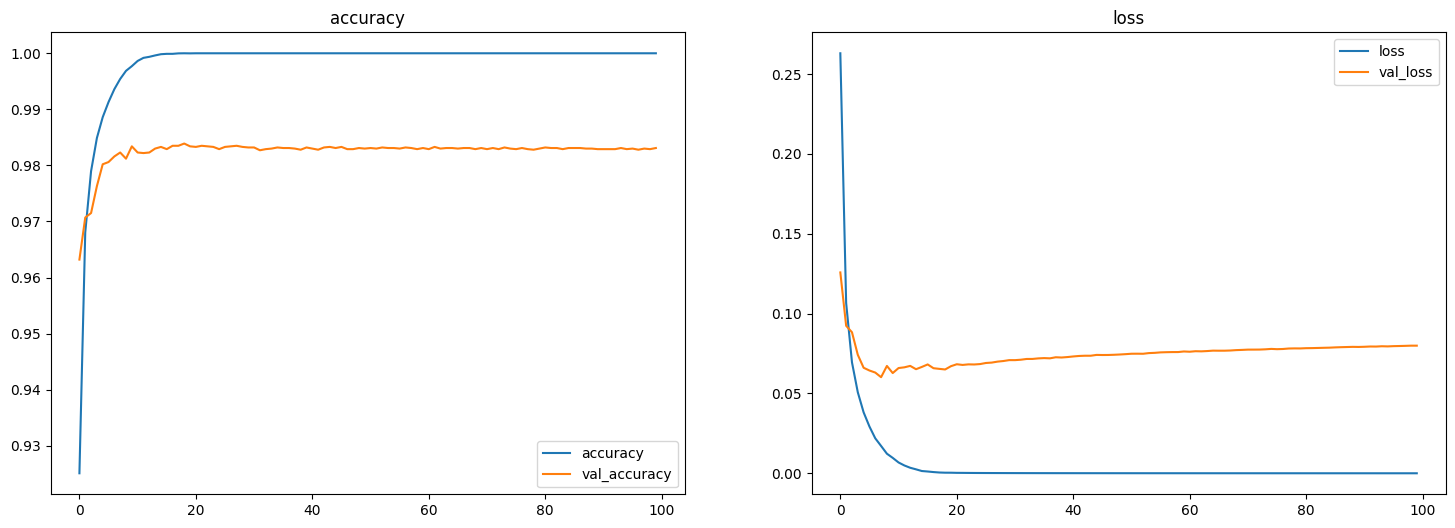

In [47]:
# accuracy와 loss 확인
# accuracy / val_accuracy
# loss / val_loss

# 필요한 값
# history 객체의 history['accuracy'] 
# history 객체의 history['val_accuracy']
# history 객체의 history['loss']
# history 객체의 history['val_loss']

plt. figure(figsize=(18, 6))

# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.legend()

plt.show()

### 모델 저장 

In [54]:
model.save('./data/img_model.h5') # legacy

In [53]:
model.save('./data/img_model.keras')

### 모델 불러오기 

In [56]:
from tensorflow.keras.models import load_model

loaded_model = load_model('./data/img_model.h5')

In [57]:
loaded_model = load_model('./data/img_model.keras')

### loaded_model 모델로 예측

In [ ]:
# predict() 사용해서 예측
# 예측 확률 반환 
# 예 : [0.1111111], 0.55777. 0.3333333,....]

In [66]:
y_pre_prob = loaded_model.predict(X_test2, verbose=0)
y_pred = y_pre_prob.argmax(axis=1) # 열방향(가로축) 값들 중에서 최대값으로 예측
y_pred[:10]
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [62]:
y_train[9]

4

In [ ]:
##################################################################

In [72]:
# X_train[9] 값으로 예측 
# X_train[9] 값을 적절한 형태로 변환하여 
# predict() 함수에 넣어서 4로 예측하는지 확인

# 학습할 때 0 ~ 1 사이의 값으로 학습

test_var = X_train[9].reshape(1, 28*28) / 255
# test_var = test_var / 255
y_pre_prob = loaded_model.predict(test_var, verbose=0)
y_pred = y_pre_prob.argmax(axis=1)
y_pred
print(y_pred)

array([4], dtype=int64)

[4]


In [73]:
X_test2.shape

(10000, 784)

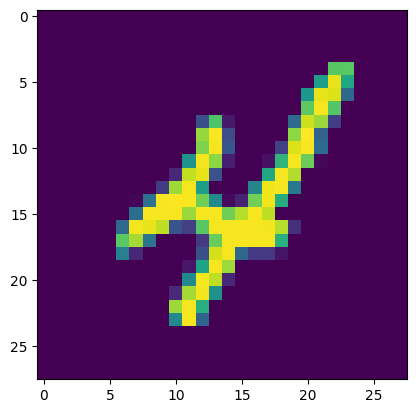

In [78]:
# X_train2[9] 값을 적절한 형태로 변환하여 
# 그래프로 출력 : imshow() 사용

digit = X_train2[9].reshape(28, 28)

plt.imshow(digit) #cmap=plt.cm.binary, cmap='RdBu', 디폴트 : viridis
plt.show()

In [74]:
digit.shape

(28, 28)

In [76]:
X_train2[9].shape

(784,)

In [79]:
X_train[9].shape

(28, 28)